C:\Users\YSekai023\AppData\Local\Temp\ipykernel_21776\3356506415.py:49: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar=plt.colorbar(cmap, ticks=c)


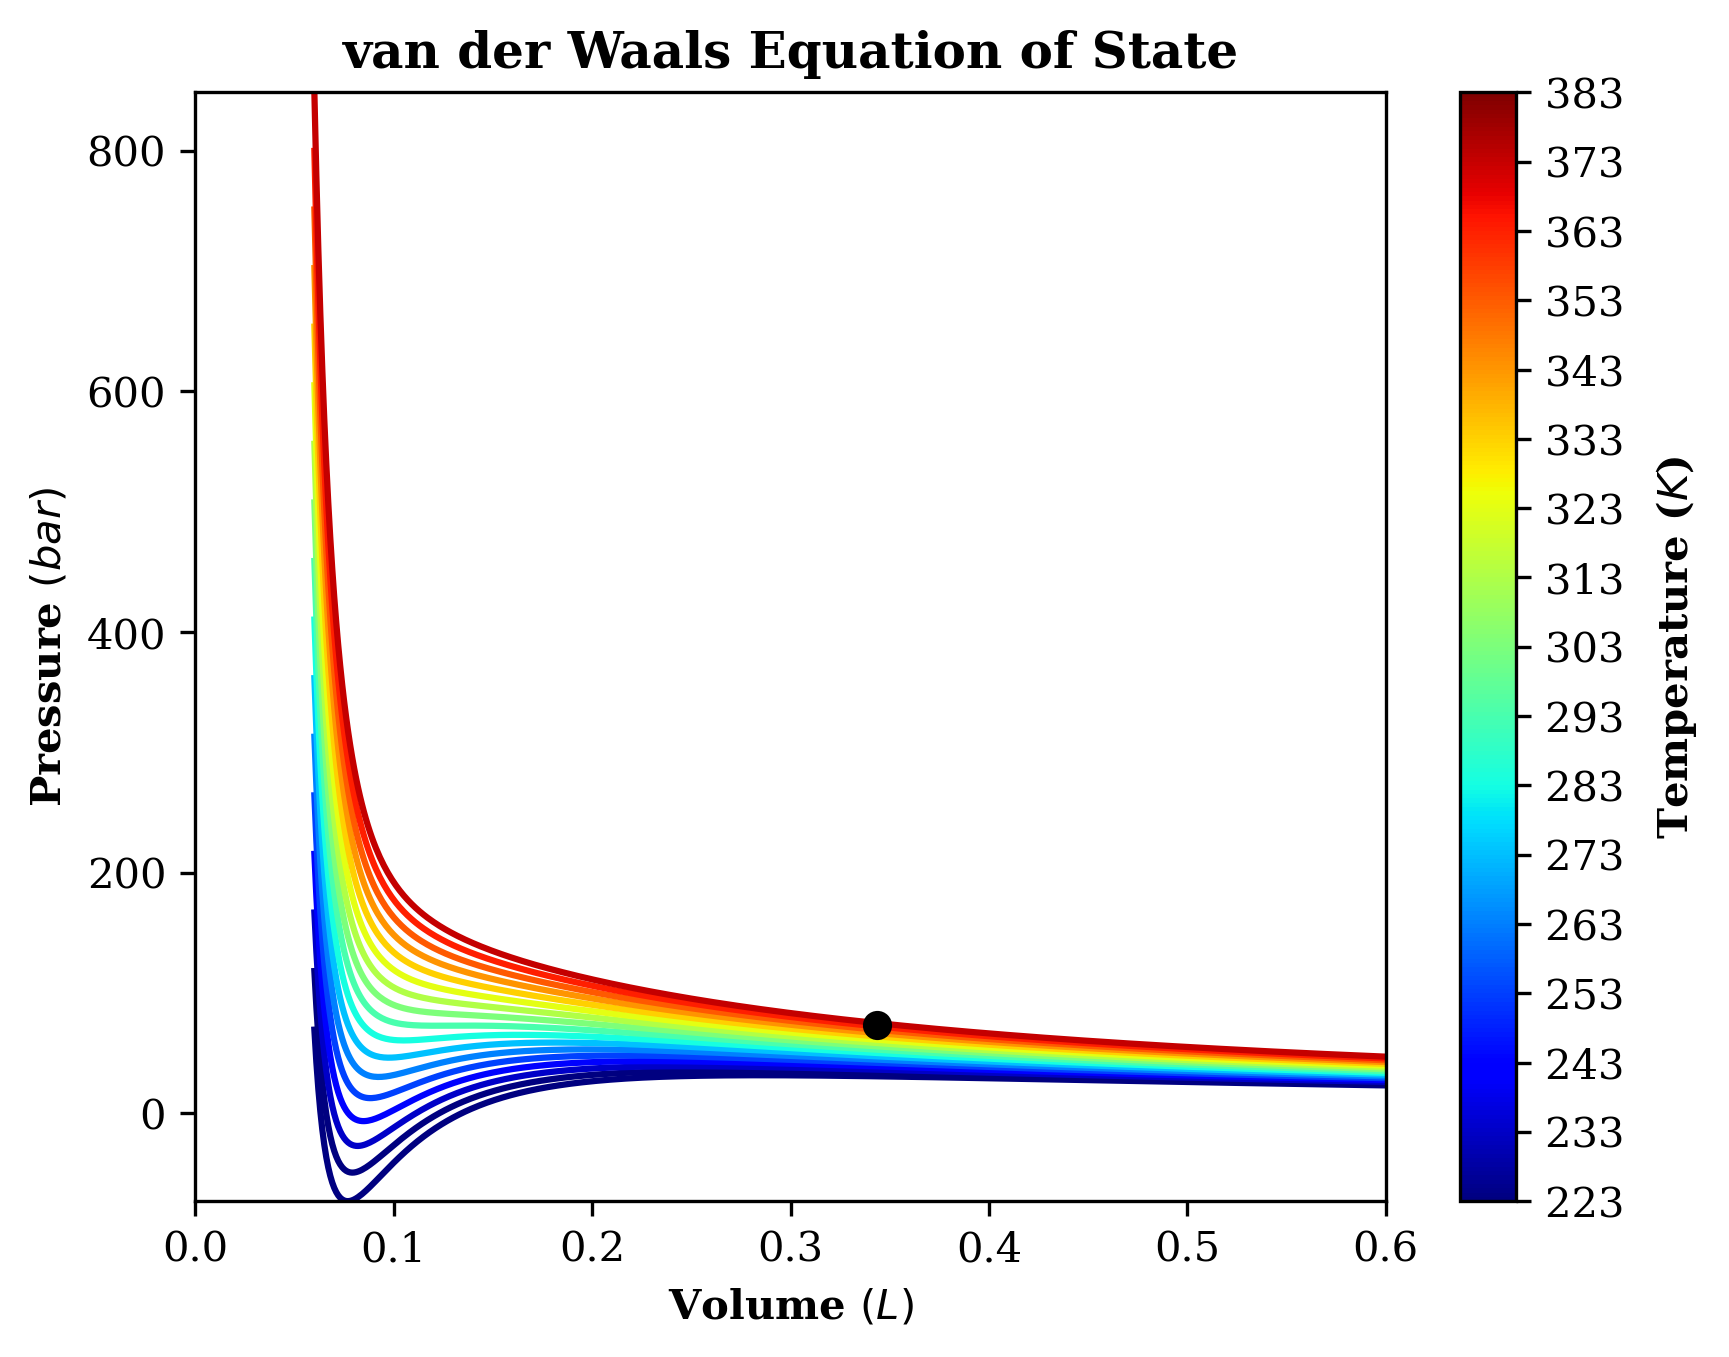

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objects as go

######## CO2 data ########
Tc = 304            # Critical temperature, K
Pc = 73.6           # Pressure, Bar
Pc = Pc*100000      # Converting pressure units, Pa
R = 8.314           # Universal gas constant, (m3.Pa)/(mol.K)

######## Temperature Range ########
T1, T2 = -50, 120                         # Start and end temperatures, °C
T_step = 10                               # Step size, °C
T = np.arange(T1+273.15,T2+273.15,T_step) # Discretisation and temperature conversion
######## Molar Volume Range ########
V1, V2 = 0.00006, 0.001     # Start and end molar volume, m3
V_step = 0.000001           # Step size, m3
V = np.arange(V1,V2,V_step) # Discretisation

######## Pressure Calculation ########
def vdw(T,V):
    # Substance-specific constants
    a = (27*R**2*Tc**2)/(64*Pc)
    b = (R*Tc)/(8*Pc)
    P = np.zeros((len(T),len(V)))
    for i in range(0,len(T)):
        for j in range(0,len(V)):
            P[i,j] = ((R*T[i])/(V[j]-b) - a/V[j]**2)/100000
            # print(P)
    return P
P_vdw = vdw(T,V)

######## 2D Visualisation ########
plt.figure(num=1, dpi=300)
plt.rcParams["font.family"] = "serif"
plt.rcParams['figure.facecolor'] = 'white'
c = np.arange(1, len(T) + 1 )
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.jet)
cmap.set_array([])
for i, yi in enumerate(P_vdw):
    plt.plot(V*1000, yi, c = cmap.to_rgba(i))
plt.plot([0 , 0.001], [0, 0], 'k--') # zero line
plt.plot((R*Tc)/Pc*1000,Pc/100000,'ko',markersize=6) # Critical point
plt.xlim([0, 0.6])
plt.ylim([P_vdw.min(),P_vdw.max()])
cbar=plt.colorbar(cmap, ticks=c)
# cbar.set_ticks(c)
cbar.set_ticklabels(T)
cbar.ax.set_yticklabels(["{:.0f}".format(i)+" " for i in T])
cbar.ax.set_ylabel('Temperature ($K$)', weight="bold")
plt.title("van der Waals Equation of State", weight="bold")
plt.xlabel("Volume $(L)$", weight="bold")
plt.ylabel("Pressure $(bar)$", weight="bold")
plt.savefig('vdw.png')
plt.show()